# LINEAR REGRESSION
* REGRESSION PROBLEM  = OUTPUT IS CONTIUNOUS VARIABLE 
* SIMPLE LINEAR REGRESSION = SINGLE INPUT VARIABLE
* MULTIPLE LINEAR REGRESSION = MULTIPLE INPUT VARIABLE 



# SIMPLE LINEAR REGRESSION 
## $ y = mx + c $

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv', usecols = ['median_income','median_house_value'], nrows=200)
df = df.apply(lambda x: x/max(x))
df.head()

,median_income,median_house_value
0,0.145083,0.174948
1,0.176788,0.209467
2,0.160363,0.224111
3,0.310030,0.191946
4,0.186988,0.171287


In [ ]:
def predict(X, weight, bias):
    return weight*X + bias

# Mean Squared Error
$MSE =  \frac{1}{N} \sum_{i=1}^{n} (y_i - (m x_i + b))^2$

In [ ]:
def cost_function(X, Y, weight, bias):
    N = len(X)
    total_error = 0.0
    for i in range(N):
        total_error += (Y[i] - (weight*X[i] + bias))**2
    return total_error / N

# Optimization (Gradient Descent)

$ f(m,b) =  \frac{1}{N} \sum_{i=1}^{n} (y_i - (mx_i + b))^2 $

Using the following:
$ (y_i - (mx_i + b))^2 = A(B(m,b)) $

We can split the derivative into
\begin{align}\begin{aligned}A(x) = x^2\\\frac{df}{dx} = A'(x) = 2x\end{aligned}\end{align}

and
\begin{align}\begin{aligned}B(m,b) = y_i - (mx_i + b) = y_i - mx_i - b\\\frac{dx}{dm} = B'(m) = 0 - x_i - 0 = -x_i\\\frac{dx}{db} = B'(b) = 0 - 0 - 1 = -1\end{aligned}\end{align}

And then using the Chain rule which states:
\begin{align}\begin{aligned}\frac{df}{dm} = \frac{df}{dx} \frac{dx}{dm}\\\frac{df}{db} = \frac{df}{dx} \frac{dx}{db}\end{aligned}\end{align}

We then plug in each of the parts to get the following derivatives
\begin{align}\begin{aligned}\frac{df}{dm} = A'(B(m,f)) B'(m) = 2(y_i - (mx_i + b)) \cdot -x_i\\\frac{df}{db} = A'(B(m,f)) B'(b) = 2(y_i - (mx_i + b)) \cdot -1\end{aligned}\end{align}

We can calculate the gradient of this cost function as:
\begin{split}\begin{align}
f'(m,b) =
  \begin{bmatrix}
    \frac{df}{dm}\\
    \frac{df}{db}\\
  \end{bmatrix}
&=
  \begin{bmatrix}
    \frac{1}{N} \sum -x_i \cdot 2(y_i - (mx_i + b)) \\
    \frac{1}{N} \sum -1 \cdot 2(y_i - (mx_i + b)) \\
  \end{bmatrix}\\
&=
  \begin{bmatrix}
     \frac{1}{N} \sum -2x_i(y_i - (mx_i + b)) \\
     \frac{1}{N} \sum -2(y_i - (mx_i + b)) \\
  \end{bmatrix}
\end{align}\end{split} 


In [ ]:
def update_weights(X, Y, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    companies = len(X)

    for i in range(companies):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*X[i] * (Y[i] - (weight*X[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(Y[i] - (weight*X[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / companies) * learning_rate
    bias -= (bias_deriv / companies) * learning_rate

    return weight, bias

In [ ]:
def train(X, Y, weight, bias, learning_rate, iters):
    cost_history = []

    for i in range(iters+1):
        weight,bias = update_weights(X, Y, weight, bias, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(X, Y, weight, bias)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, weight, bias, cost))
            plt.figure(figsize=(12, 7))
            ax = plt.axes()
            ax.scatter(X, Y)
            ax.plot(X, predict(X, weight, bias))
            plt.show()

    return weight, bias, cost_history

iter=0    weight=0.95    bias=0.7925    cost=0.67


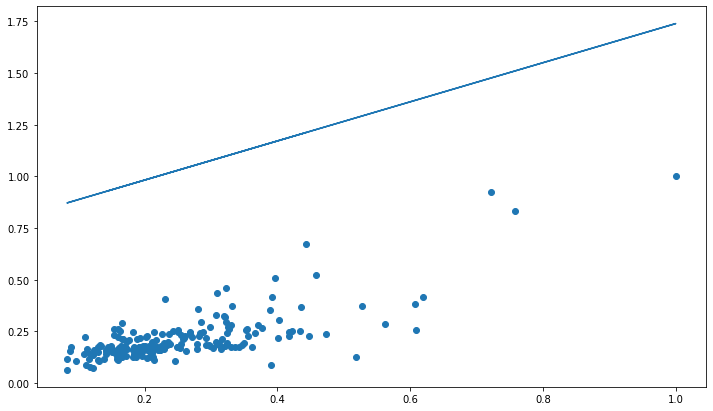

iter=10    weight=0.77    bias=0.0957    cost=0.012


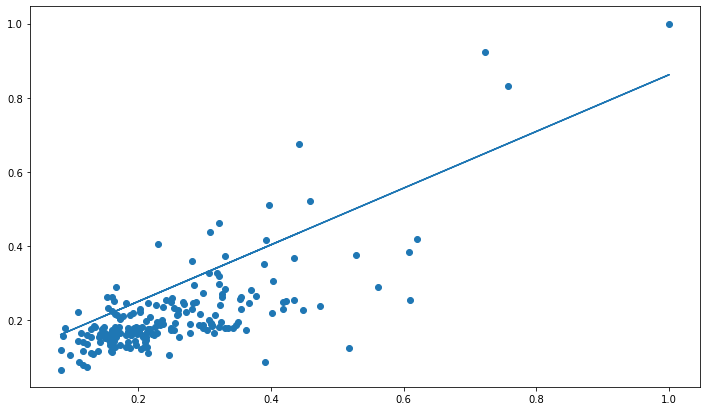

iter=20    weight=0.75    bias=0.0324    cost=0.0064


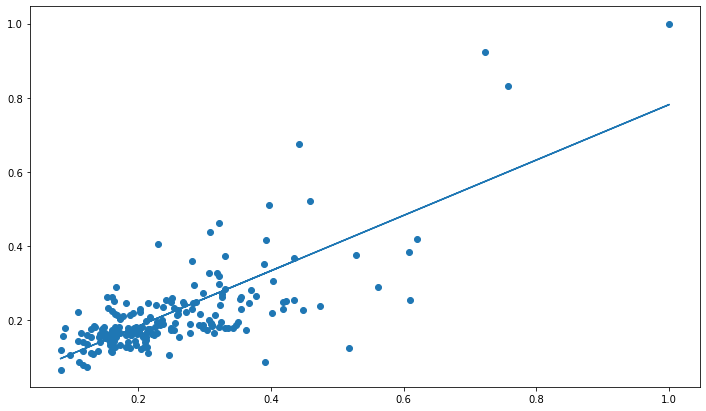

iter=30    weight=0.75    bias=0.0269    cost=0.0063


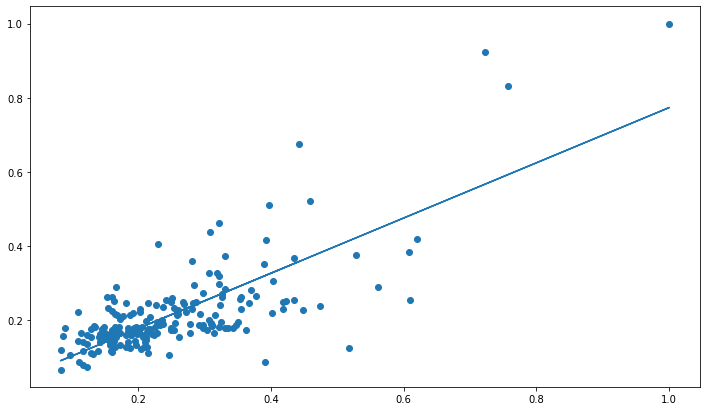

iter=40    weight=0.74    bias=0.0267    cost=0.0063


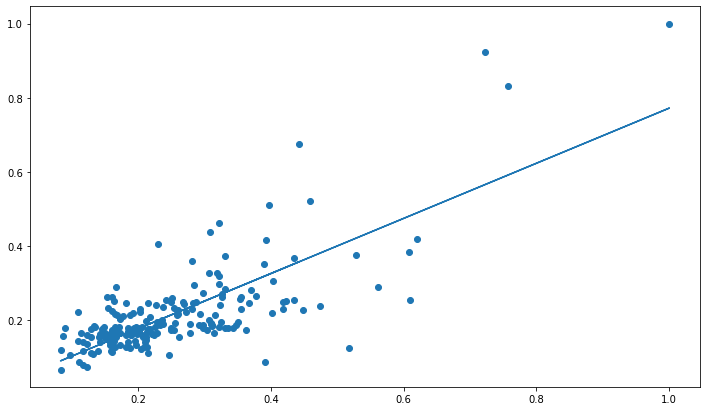

iter=50    weight=0.74    bias=0.0269    cost=0.0063


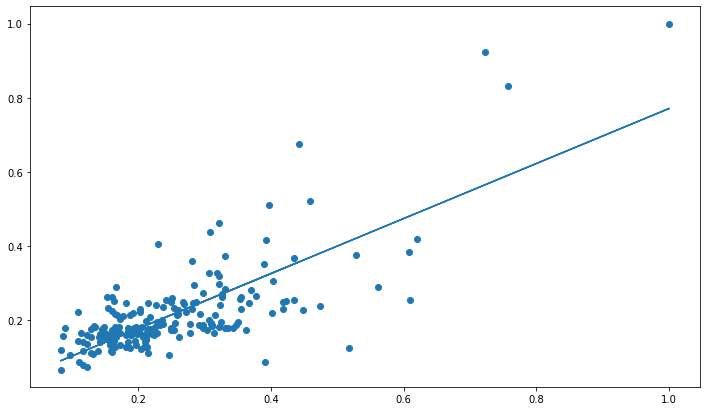

In [ ]:
X, Y = df['median_income'], df['median_house_value']
weight, bias, cost_history = train(X, Y, 1, 1, .1, 50)